## Práctica de Clasificación Lineal: Regresión Logística

En esta práctica utilizaremos el dataset MNIST, compuesto por 60000 imágenes de train y 10000 imagenes de test (de 28x28 pixeles) correspondientes a distintas versiones digitalizadas de los dígitos 0, ..., 9.

El objetivo es clasificar correctamente cada una de las imágenes, utilizando el valor de los 784 pixeles.

## Introducción:

In [1]:
#Set the directory to be able to read the data properly
rm(list=ls())
setwd("C:/Users/Johana Combita/Documents/Master DS/Estadistica_Descriptiva/3ra_parte/2_Practica_de_clasificacion")

#Install the necessary packages
#install.packages("R.utils")

Descarga del dataset: 4 archivos diferentes para crear los datasets de train (x_train->train-image e y_train->train-labels) y de test (x->t10k-images e y->t10k-labels).

In [2]:
# download data from http://yann.lecun.com/exdb/mnist/
#download.file("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
#              "train-images-idx3-ubyte.gz")
#download.file("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
#              "train-labels-idx1-ubyte.gz")
#download.file("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
#              "t10k-images-idx3-ubyte.gz")
#download.file("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz",
#              "t10k-labels-idx1-ubyte.gz")

# gunzip the files
#R.utils::gunzip("train-images-idx3-ubyte.gz")
#R.utils::gunzip("train-labels-idx1-ubyte.gz")
#R.utils::gunzip("t10k-images-idx3-ubyte.gz")
#R.utils::gunzip("t10k-labels-idx1-ubyte.gz")

In [3]:
# load image files
load_image_file = function(filename) {
  ret = list()
  f = file(filename, 'rb')
  readBin(f, 'integer', n = 1, size = 4, endian = 'big')
  n    = readBin(f, 'integer', n = 1, size = 4, endian = 'big')
  nrow = readBin(f, 'integer', n = 1, size = 4, endian = 'big')
  ncol = readBin(f, 'integer', n = 1, size = 4, endian = 'big')
  x = readBin(f, 'integer', n = n * nrow * ncol, size = 1, signed = FALSE)
  close(f)
  data.frame(matrix(x, ncol = nrow * ncol, byrow = TRUE))
}

# load label files
load_label_file = function(filename) {
  f = file(filename, 'rb')
  readBin(f, 'integer', n = 1, size = 4, endian = 'big')
  n = readBin(f, 'integer', n = 1, size = 4, endian = 'big')
  y = readBin(f, 'integer', n = n, size = 1, signed = FALSE)
  close(f)
  y
}

In [4]:
# load images
x_train = load_image_file("train-images-idx3-ubyte")
#x_test  = load_image_file("t10k-images-idx3-ubyte")

# load labels
y_train = load_label_file("train-labels-idx1-ubyte")
#y_test  = load_label_file("t10k-labels-idx1-ubyte")

Dibujamos los 6 primeros digitos y graficamos un histograma para ver si el dataset esta equilibrado.

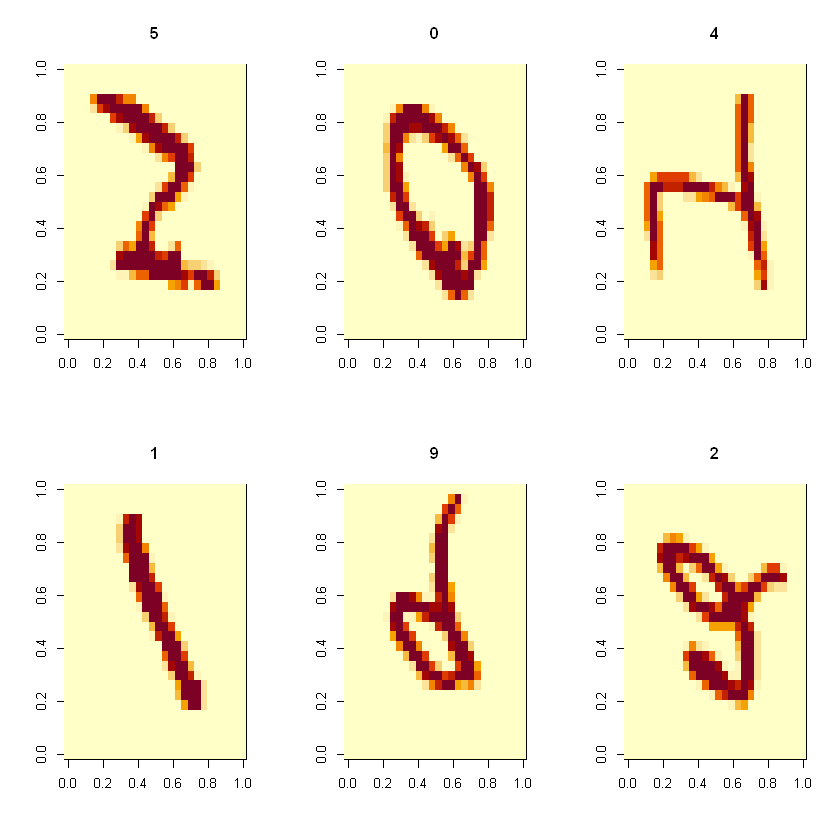

In [5]:
# Dibujamos los 6 primeros dígitos de la base de datos
par(mfrow = c(2,3))
for (i in 1:6) {
    image(matrix(as.matrix(x_train[i,1:784]), nrow = 28, ncol = 28))
    title(y_train[i])
}

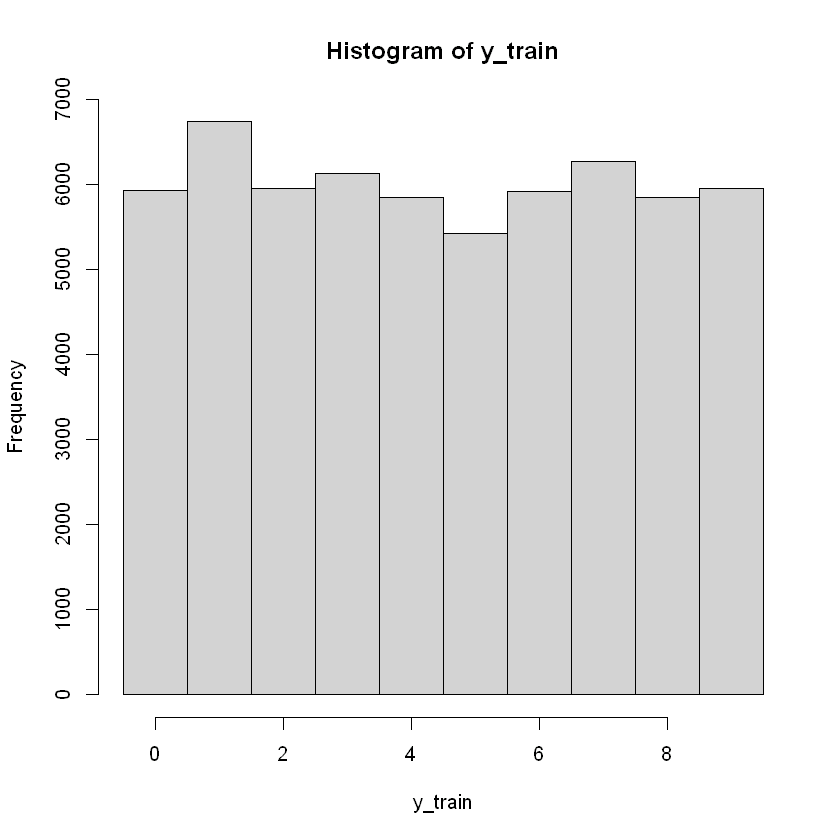

In [6]:
# Cada dígito está igualmente representado en la muestra
hist(y_train, breaks = -0.5:9.5)

In [7]:
# Cada dígito está igualmente representado en la muestra
y_train
length(y_train)

[1] 5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5
   [37] 6 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7
   [73] 1 6 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3
  [109] 0 2 9 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2
  [145] 8 5 8 6 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3
  [181] 2 3 5 9 1 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3
  [217] 0 4 6 5 2 6 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1
  [253] 2 2 3 3 6 4 7 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5
  [289] 7 4 1 3 4 0 4 8 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6
  [325] 7 2 0 3 5 4 3 6 5 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0
  [361] 2 3 9 4 9 2 1 6 8 4 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6
  [397] 5 1 1 0 2 6 4 5 8 3 1 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6
  [433] 2 3 9 0 7 5 4 8 0 9 4 1 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7
  [469] 7 8 1 9 2 0 5 1 2 2 7 3 5 4 9 7 1 8 3 9 6 0 3 1 1 2 6 3 5 7 6 8 3 9 5 8
  [505] 5 7 6 1 1 3 1 7 5 5 5 2 5 8 7 0 9 7 7 5 0 9 0 0 8 9 2 4 8 1 6 1 6 5 1 8
  [541] 3 4 0 5 5 8 3 6 2 3 9 2 1 1 5 2 1 3 2 8 7 3 7 2 4 6 9 7 2 4 2 8 1 1 3 8
  [577] 4 0 6 5 9 3 0 9 2 4 7 1 2 9 4 2 6 1 8 9 0 6 6 7 9 9 8 0 1 4 4 6 7 1 5 7
  [613] 0 3 5 8 4 7 1 2 5 9 5 6 7 5 9 8 8 3 6 9 7 0 7 5 7 1 1 0 7 9 2 3 7 3 2 4
  [649] 1 6 2 7 5 5 7 4 0 2 6 3 6 4 0 4 2 6 0 0 0 0 3 1 6 2 2 3 1 4 1 5 4 6 4 7
  [685] 2 8 7 9 2 0 5 1 4 2 8 3 2 4 1 5 4 6 0 7 9 8 4 9 8 0 1 1 0 2 2 3 2 4 4 5
  [721] 8 6 5 7 7 8 8 9 7 4 7 3 2 0 8 6 8 6 1 6 8 9 4 0 9 0 4 1 5 4 7 5 3 7 4 9
  [757] 8 5 8 6 3 8 6 9 9 1 8 3 5 8 6 5 9 7 2 5 0 8 5 1 1 0 9 1 8 6 7 0 9 3 0 8
  [793] 8 9 6 7 8 4 7 5 9 2 6 7 4 5 9 2 3 1 6 3 9 2 2 5 6 8 0 7 7 1 9 8 7 0 9 9
  [829] 4 6 2 8 5 1 4 1 5 5 1 7 3 6 4 3 2 5 6 4 4 0 4 4 6 7 2 4 3 3 8 0 0 3 2 2
  [865] 9 8 2 3 7 0 1 1 0 2 3 3 8 4 3 5 7 6 4 7 7 8 5 9 7 0 3 1 6 2 4 3 4 4 7 5
  [901] 9 6 9 0 7 1 4 2 7 3 6 7 5 8 4 5 5 2 7 1 1 5 6 8 5 8 4 0 7 9 9 2 9 7 7 8
  [937] 7 4 2 6 9 1 7 0 6 4 2 5 7 0 7 1 0 3 7 6 5 0 6 1 5 1 7 8 5 0 3 4 7 7 5 7
  [973] 8 6 9 3 8 6 1 0 9 7 1 3 0 5 6 4 4 2 4 4 3 1 7 7 6 0 3 6 0 7 1 1 4 9 4 3
 [1009] 4 8 2 2 1 8 7 0 8 1 0 7 6 3 7 7 5 8 8 9 0 0 4 1 5 2 2 3 9 4 9 5 0 6 7 7
 [1045] 1 8 0 2 2 0 4 1 1 2 7 3 9 7 2 8 1 9 5 8 8 1 9 8 3 1 6 5 7 4 2 7 0 3 0 4
 [1081] 1 1 7 9 1 1 8 5 7 5 0 6 6 0 4 1 2 3 4 4 6 8 0 9 5 8 7 0 3 5 4 5 9 6 7 1
 [1117] 9 6 1 3 8 3 9 1 2 7 7 7 0 2 3 1 1 4 2 5 6 0 9 6 2 8 9 2 3 3 6 9 1 4 3 3
 [1153] 0 7 7 1 7 7 3 6 4 9 5 4 4 2 7 9 0 9 8 4 4 9 1 2 4 9 3 0 4 1 6 2 6 3 7 4
 [1189] 2 6 6 7 1 8 9 0 4 1 4 2 1 3 6 4 6 7 5 8 7 0 5 1 4 2 8 4 7 7 3 8 4 9 5 8
 [1225] 6 7 3 4 6 7 1 7 4 3 3 9 8 8 1 8 6 3 1 1 3 5 2 8 4 2 9 7 1 4 8 2 9 6 4 1
 [1261] 3 4 2 5 2 5 6 8 0 6 2 4 9 4 9 4 5 1 5 8 4 7 9 5 9 5 9 1 5 8 3 9 9 1 8 3
 [1297] 8 6 5 2 7 2 7 6 0 9 7 9 4 6 0 5 3 5 7 3 9 3 6 8 3 1 7 6 5 5 7 6 5 8 2 1
 [1333] 7 9 2 7 3 6 7 8 5 3 7 7 8 4 0 7 3 0 6 3 9 7 1 9 5 3 6 0 9 2 8 0 9 1 6 0
 [1369] 0 1 9 0 0 4 2 1 7 0 3 4 4 7 5 9 8 2 0 0 8 6 2 2 7 6 1 2 9 2 6 9 7 9 5 0
 [1405] 8 1 5 2 4 3 9 4 7 5 6 6 7 7 6 8 5 9 7 0 6 1 9 2 3 3 5 4 3 5 8 6 3 7 2 8
 [1441] 4 9 5 0 2 1 4 2 4 3 1 7 1 8 0 9 6 8 1 9 4 4 9 1 8 9 6 5 5 3 3 0 1 4 3 8
 [1477] 3 4 2 0 7 5 5 1 8 5 3 4 6 0 5 7 2 6 6 0 1 1 4 7 9 0 0 6 6 8 6 9 4 5 2 4
 [1513] 0 7 5 6 5 0 9 8 6 1 9 7 5 7 5 1 1 3 0 2 0 3 8 1 6 4 6 2 6 4 8 8 1 4 4 7
 [1549] 1 2 2 3 9 6 4 9 5 6 2 3 9 2 6 2 7 4 3 6 4 9 7 0 2 2 9 5 4 5 0 1 4 3 6 3
 [1585] 2 9 7 5 3 7 0 9 5 8 3 2 0 1 8 3 0 1 2 3 4 0 0 1 7 2 9 3 9 4 2 5 8 6 7 7
 [1621] 9 8 9 9 2 0 0 1 4 2 4 3 9 4 3 5 7 6 5 7 1 8 6 9 3 0 4 1 2 2 5 3 7 4 1 7
 [1657] 7 8 1 9 2 3 2 4 0 1 8 4 3 6 5 6 4 7 9 3 1 3 0 2 1 1 0 9 9 4 6 7 6 3 5 5
 [1693] 4 4 6 9 1 1 3 1 1 0 5 1 4 4 6 6 6 0 1 2 0 8 2 2 1 1 3 7 9 5 3 0 2 0 6 2
 [1729] 9 0 7 6 9 9 1 2 9 3 4 7 9 6 0 9 4 8 7 7 9 8 6 9 5 2 2 2 3 9 8 8 8 6 4 4
 [1765] 4 4 2 4 6 0 7 0 7 8 2 0 8 8 3 6 8 6 6 8 6 5 1 1 8 7 8 3 6 8 9 5 0 0 0 3
 [18

[1] 60000

## 1. Clasificación lineal

El objetivo es clasificar correctamente cada una de las imágenes del dataset, utilizando el valor de los 784 pixeles. Este problema se encuandra dentro de la clasificación multi-categoría (tenemos 10 posibles clases a predicir para cada dato). 

Para simplificar estos problemas, se suelen consideran tantos problemas binarios (predecir sí o no) independientes como categorías se tengan. Es decir, se crea un modelo para clasificar el numero 0 (si o no), otro para clasificar el numero 1, etc. En este ejemplo, consideramos el dígito '9' y el objetivo es predecir si una imagen es 9 o no.

In [8]:
# Seleccionamos un dígito concreto para tratar de predecirlo. Por ejemplo el nueve
# y9 = 1 si el dígito es 9 y 0 en caso contrario
y9 <- y_train;
y9[which(y_train != 9)] <- 0 ; y9[which(y_train == 9)] <- 1
y9

[1] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
   [37] 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
  [181] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
  [325] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
  [361] 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0
  [433] 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  [469] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
  [757] 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
  [793] 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
  [937] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 [1117] 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 [1369] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 [1405] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 [1513] 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [1585] 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 [1621] 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 [1693] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [1729] 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [18

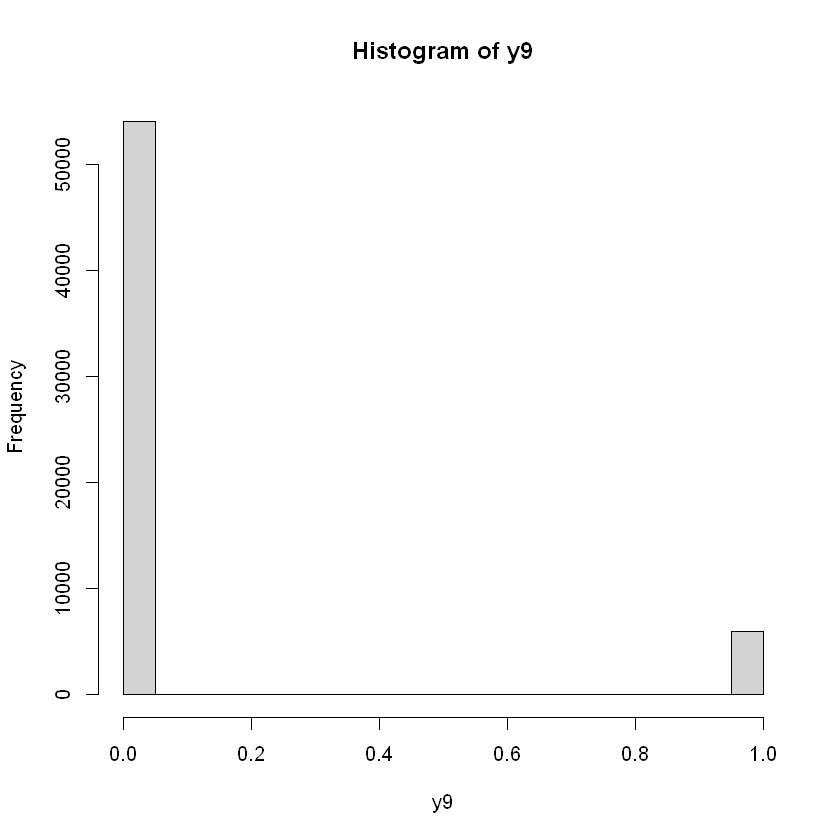

In [9]:
# Construimos un dataframe para entrenar el modelo
dat <- data.frame(y9, x_train)
hist(y9)

Como el tamaño de la muestra es muy grande (60000 imagenes), seleccionamos una muestra para entrenar; por ejemplo, los 5000 primeros dígitos.

In [10]:
i<- 1:5000;
j<-5001:10000
#Random sampling
#i<-sample(1:dim(x)[1],5000);
datT <- dat[i,]
datt <- dat[j,]

Entrenamos (o ajustamos) primero un modelo de regresión lineal con varias variables para predecir un '0' o un '1' y clasificar el numero 9.  \$ \Rightarrow y=f(x)=\alpha_{0}+\alpha_{1} \cdot x_{1} + \alpha_{2} \cdot x_{2} + ... + \alpha_{N} \cdot x_{N}$.

\$\begin{bmatrix}
y_{1}\\ 
y_{2}\\ 
...\\ 
y_{N}
\end{bmatrix} = \begin{bmatrix}
1 & x_{1,1} & x_{2,1} & ... & x_{M,1} \\
1 & x_{1,2} & x_{2,2} & ... & x_{M,2} \\
... & ... & ... & ... & ... \\
1 & x_{1,N} & x_{2,N} & ... & x_{M,N} \\
\end{bmatrix} \begin{bmatrix}
\alpha_{0}\\ 
\alpha_{1}\\ 
...\\ 
\alpha_{N}
\end{bmatrix}$

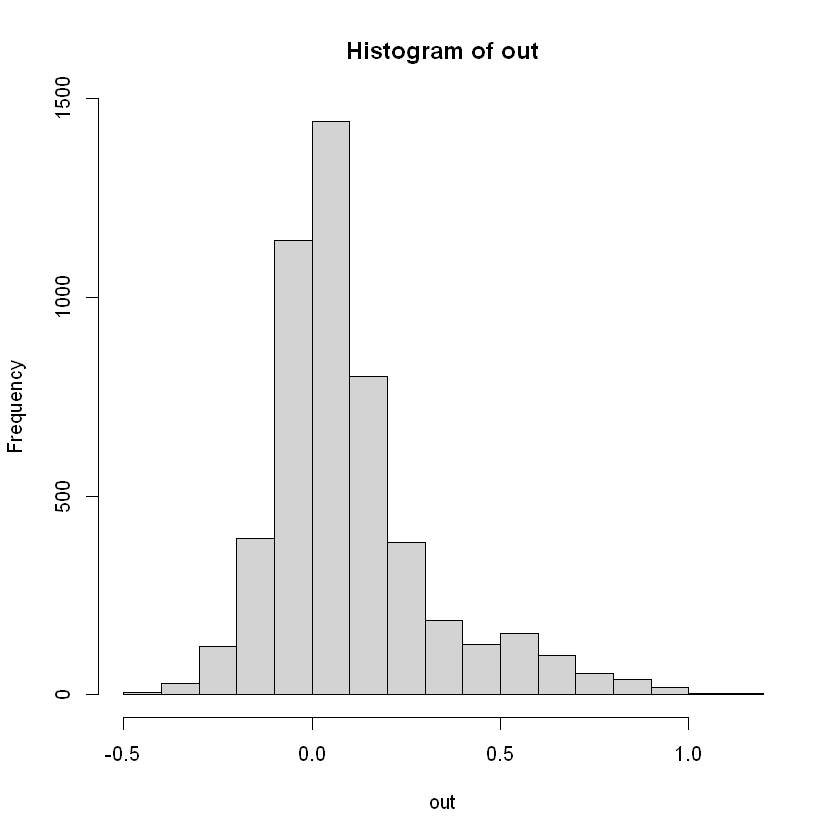

In [11]:
# Entrenamos primero un modelo lineal
model <- lm(datT$y9~., data = datT)
out <- model$fitted.values
# El histograma muestra valores predichos (incluyendo negativos y mayores que 1)
hist(out)

El modelo entrenado no es el mas adecuado ya que no está acotado y puede tomar valores mucho mayores que 1 o menores que 0. Hacemos la salida del modelo binaria, considerando el umbral en 0.5 (a modo de probabilidad) y calculamos la tasa de acierto con los datos de train.

In [12]:
# Hacemos binaria la salida considerando el umbral 0.5 (a modo de probabilidad)
outbin <- as.double(out > 0.5)
# Tasa de acierto (en entrenamiento)
100*sum(diag(table(datT[,1], outbin))) / length(outbin)

[1] 96.18

In [13]:
table(datT[,1], outbin)

   outbin
       0    1
  0 4474   31
  1  160  335

In [14]:
# Tasa de acierto de test
out1<- predict(object=model, newdata = datt);
outbin1 <- as.double(out1 > 0.5)
100*sum(diag(table(datt[,1], outbin1))) / length(outbin1)

Warning message in predict.lm(object = model, newdata = datt):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


[1] 94.68

## 2. Clasificación o Regresión logística

Construimos un modelo de regresión logística utilizando la función 'glm' con la familia 'family = binomial(link = "logit")'.

https://bookdown.org/ndphillips/YaRrr/logistic-regression-with-glmfamily-binomial.html

In [15]:
model2 <- glm(datT$y9~., data = datT, family = binomial(link = "logit"))

# Tasa de acierto (Train)
out2 <- model2$fitted.values
outbin2 <- as.double(out2 > 0.5)
100*sum(diag(table(datT[,1], outbin2))) / length(outbin2)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] 98.36

   outbin2
       0    1
  0 4462   43
  1   39  456

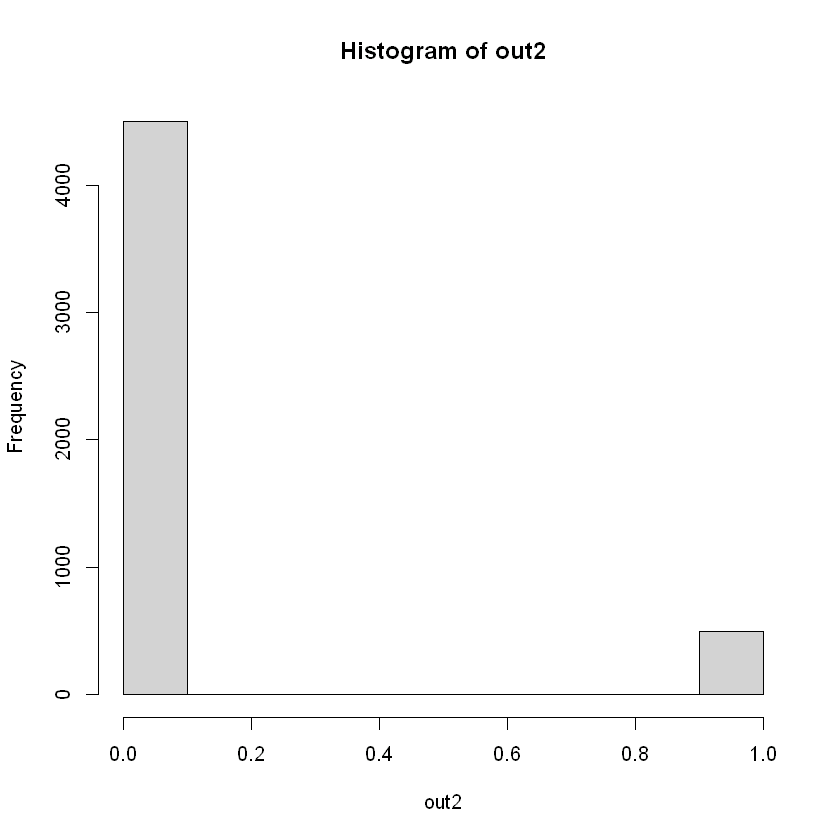

In [16]:
table(datT[,1], outbin2)
hist(out2)

In [17]:
# Tasa de acierto (test)
out3<- predict(object=model2, newdata = datt);
outbin3 <- as.double(out3 > 0.5)
100*sum(diag(table(datt[,1], outbin3))) / length(outbin3)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


[1] 91.88

## 3. Curvas ROC (extra 1)

Hasta ahora hemos utilizado la tasa de acierto como medida de validación de los clasificadores. Para ello, las predicciones probabilísticas se tiene que convertir a binarias (utilizando un umbral para al probabilidad). Sin embargo, existen otras medidas más generales que consideran el carácter probabilístico de la predicción. Leer https://es.wikipedia.org/wiki/Curva_ROC

Las curvas ROC es una representación gráfica de la sensibilidad frente a la razón de falsas alarmas (1-especificidad) para un sistema clasificador binario según se varía el umbral de discriminación.

**VP**, Verdaderos Positivos. **VN**, Verdaderos Negativos. **FP**, Falsos Positivos, **FN**, Falsos Negativos

**Sensibilidad (o Razón de Verdaderos Positivos)** \$ \Rightarrow VPR = \frac{VP}{VP+FN}$.

**Razon de falsos positivos** \$ \Rightarrow FPR = \frac{FP}{FP+VN}$.

**Accuracy** \$ \Rightarrow ACC = \frac{VP+VN}{P+N}$.

**Especificidad** \$ \Rightarrow SPC = \frac{VN}{FP+VN}$.

La VPR mide hasta qué punto un clasificador o prueba diagnóstica es capaz de detectar o clasificar los casos positivos correctamente, de entre todos los casos positivos disponibles durante la prueba. 

La FPR define cuántos resultados positivos son incorrectos de entre todos los casos negativos disponibles durante la prueba.

In [18]:
#install.packages("AUC")

library("AUC")

AUC 0.3.2

Type AUCNews() to see the change log and ?AUC to get an overview.



   outbin3
       0    1
  0 4228  289
  1  117  366

0      1 
0.8456 0.0732

[1] 0.9368473

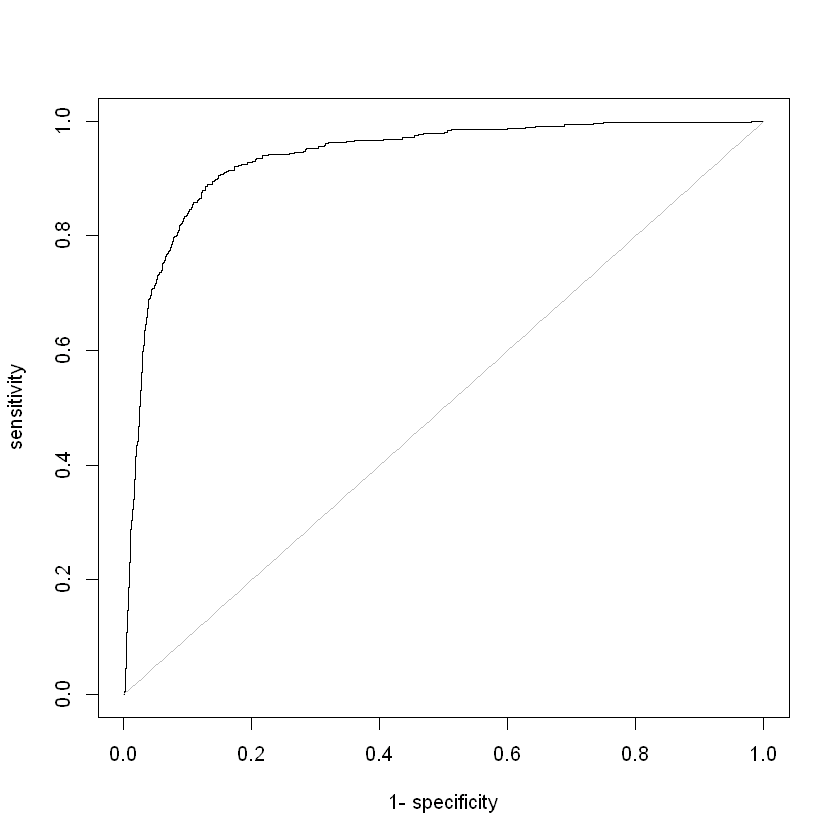

In [19]:
roc <-roc(out3, as.factor(datt[,1]))
table(datt[,1], outbin3)
diag(table(datt[,1], outbin3)) / length(outbin3)
auc(roc)
plot(roc)

## 4. Reduccion de variables (extra 2)

#### (195 not defined because of singularities)
Las inestabilidades numéricas se producen por la alta dimensionalidad de los datos. Algunos de los coeficientes resultan redundantes y el proceso de optimización no converge. Una solución a este problema es reducir la dimensionalidad del conjunto de predictores. Para ello existen técnicas eficientes (como los métodos de regularización o las Componentes Principales).

#### 1. "Fuerza bruta"

En esta práctica utilizamos un entresacado de información, considerando sólo uno de cada 20 pixeles.

In [20]:
#Regresión logística
j<-seq(1,784,20)
model <- glm(datT$y9~., data = datT[,j], family = binomial(link = "logit"))
out <- model$fitted.values
outbin <- as.double(out > 0.5)

# Tasa de acierto con el dataset de Train
sprintf("Train accuracy %f", 100*sum(diag(table(datT[,1], outbin))) / length(outbin)) 

# Tasa de acierto con el dataset de Test
out1<- predict(object=model, newdata = datt[,j]);
outbin1 <- as.double(out1 > 0.5)
sprintf("Test accuracy %f", 100*sum(diag(table(datt[,1], outbin1))) / length(outbin1))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] "Train accuracy 92.020000"

[1] "Test accuracy 92.260000"

#### 2. Eliminar columnas con varianza cercana a cero

In [21]:
# Instalar y cargar las bibliotecas necesarias
# install.packages(c("caret", "glmnet"))
library(caret)

Warning message:
"package 'caret' was built under R version 4.4.2"
Cargando paquete requerido: ggplot2

Cargando paquete requerido: lattice


Adjuntando el paquete: 'caret'


The following objects are masked from 'package:AUC':

    sensitivity, specificity




In [22]:
# Verificar las varianzas
variances <- apply(x_train, 2, var)
print(variances)


          X1           X2           X3           X4           X5           X6 
0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 
          X7           X8           X9          X10          X11          X12 
0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 
         X13          X14          X15          X16          X17          X18 
2.259327e-01 1.852836e+00 7.776000e-01 1.350000e-03 0.000000e+00 0.000000e+00 
         X19          X20          X21          X22          X23          X24 
0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 
         X25          X26          X27          X28          X29          X30 
0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 
         X31          X32          X33          X34          X35          X36 
0.000000e+00 0.000000e+00 4.266667e-03 3.788312e-02 1.113049e+00 4.389500e+00 
         X37          X38          X39          X40 

In [23]:
# Eliminar columnas con varianza cercana a cero
lowVarCols <- nearZeroVar(x_train)
trainData <- x_train[, -lowVarCols]

In [24]:
trainData

X153,X154,X155,X156,X157,X158,X159,X160,X179,X180,⋯,X655,X656,X657,X658,X659,X660,X661,X684,X685,X686
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,18,18,18,126,136,175,26,94,154,⋯,253,244,133,11,0,0,0,16,0,0
0,0,48,238,252,252,252,237,0,0,⋯,253,252,141,37,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,124,253,0,0,⋯,253,220,0,0,0,0,0,220,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,218,252,56,0,0,0
0,0,0,13,25,100,122,7,0,0,⋯,0,0,0,0,0,0,0,0,0,0
237,253,252,71,0,0,0,0,0,11,⋯,0,0,0,0,31,211,252,0,0,0
43,105,255,253,253,253,253,253,139,224,⋯,252,252,217,207,146,45,0,103,24,0
5,63,197,0,0,0,0,0,0,0,⋯,0,0,0,0,230,247,40,0,0,0


In [25]:
# Seleccionamos un dígito concreto para tratar de predecirlo. Por ejemplo el nueve
# y9 = 1 si el dígito es 9 y 0 en caso contrario
y9 <- y_train;
y9[which(y_train != 9)] <- 0 ; y9[which(y_train == 9)] <- 1

# Construimos un dataframe para entrenar el modelo
dat <- data.frame(y9, trainData)

# Seleccionamos una muestra para entrenar; por ejemplo, los 5000 primeros dígitos.
i<- 1:5000;
j<-5001:10000
#Random sampling
#i<-sample(1:dim(x)[1],5000);
datT <- dat[i,]
datt <- dat[j,]

In [26]:
#Regresión logística
model <- glm(datT$y9~., data = datT, family = binomial(link = "logit"))
out <- model$fitted.values
outbin <- as.double(out > 0.5)

# Tasa de acierto con el dataset de Train
100*sum(diag(table(datT[,1], outbin))) / length(outbin)

# Tasa de acierto con el dataset de Test
out1<- predict(object=model, newdata = datt);
outbin1 <- as.double(out1 > 0.5)
100*sum(diag(table(datt[,1], outbin1))) / length(outbin1)


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] 97.3

[1] 95.26

#### 3. PCA

In [27]:
# Reducción de dimensionalidad mediante PCA
n_components <- 50  # Número de componentes principales a retener
pca <- prcomp(trainData[, -1], center = TRUE, scale. = TRUE)
trainData_pca <- predict(pca, trainData[, -1])[, 1:n_components]

In [28]:
# Seleccionamos un dígito concreto para tratar de predecirlo. Por ejemplo el nueve
# y9 = 1 si el dígito es 9 y 0 en caso contrario
y9 <- y_train;
y9[which(y_train != 9)] <- 0 ; y9[which(y_train == 9)] <- 1

# Construimos un dataframe para entrenar el modelo
dat <- data.frame(y9, trainData_pca)

# Seleccionamos una muestra para entrenar; por ejemplo, los 5000 primeros dígitos.
i<- 1:5000;
j<-5001:10000
#Random sampling
#i<-sample(1:dim(x)[1],5000);
datT <- dat[i,]
datt <- dat[j,]

In [29]:
#Regresión logística
model <- glm(datT$y9~., data = datT, family = binomial(link = "logit"))
out <- model$fitted.values
outbin <- as.double(out > 0.5)

# Tasa de acierto con el dataset de Train
100*sum(diag(table(datT[,1], outbin))) / length(outbin)

# Tasa de acierto con el dataset de Test
out1<- predict(object=model, newdata = datt);
outbin1 <- as.double(out1 > 0.5)
100*sum(diag(table(datt[,1], outbin1))) / length(outbin1)

[1] 96.32

[1] 95.36

## PRACTICA

Construir un modelo de clasificación para cada dígito, y obtener una ranking de los dígitos en base a su capacidad predictiva (el primero el que mejor se predice, etc.). Para evaluar la capacidad predictiva considerando el error de test obtenido al separar aleatoriamente la muestra en un conjunto de train (n=10000) y el resto de test. Tener en cuenta la variabilidad del error de test a la hora de construir el ranking anterior. Para ello, además de calcular la tasa de acierto para cada dígito, considerar también un "intervalo de confianza" obtenido como la dispersión (o desviación típica) de 10 medidas de test obtenidas con 10 muestras aleatorias distintas. ¿Existe algún dígito que pueda predecirse significativamente mejor que los demás?

In [31]:
# Primero se hace la reducción de la dimensionalidad
# Eliminar columnas con varianza cercana a cero
lowVarCols = nearZeroVar(x_train)
trainData_x = x_train[, -lowVarCols]

In [32]:
#str(x_train)
str(trainData_x)
# Se redujo de 784 a 249 variables, pero siguen siendo bastantes

'data.frame':	60000 obs. of  249 variables:
 $ X153: int  3 0 0 0 0 0 237 43 5 0 ...
 $ X154: int  18 0 0 0 0 0 253 105 63 0 ...
 $ X155: int  18 48 0 0 0 0 252 255 197 0 ...
 $ X156: int  18 238 0 0 0 13 71 253 0 0 ...
 $ X157: int  126 252 0 0 0 25 0 253 0 0 ...
 $ X158: int  136 252 0 0 0 100 0 253 0 0 ...
 $ X159: int  175 252 0 124 0 122 0 253 0 0 ...
 $ X160: int  26 237 0 253 0 7 0 253 0 0 ...
 $ X179: int  94 0 0 0 0 0 0 139 0 0 ...
 $ X180: int  154 0 0 0 0 0 11 224 0 0 ...
 $ X181: int  170 0 0 0 0 0 175 226 20 0 ...
 $ X182: int  253 54 0 0 0 33 253 252 254 0 ...
 $ X183: int  253 227 0 0 0 151 252 253 230 0 ...
 $ X184: int  253 253 0 0 0 208 71 252 24 0 ...
 $ X185: int  253 252 0 0 0 252 0 252 0 0 ...
 $ X186: int  253 239 0 96 0 252 0 252 0 0 ...
 $ X187: int  225 233 0 244 0 252 0 252 0 0 ...
 $ X188: int  172 252 0 251 0 146 0 252 0 0 ...
 $ X189: int  253 57 120 253 0 0 0 252 0 136 ...
 $ X206: int  253 0 0 0 0 0 0 178 0 0 ...
 $ X207: int  253 0 0 0 0 0 0 252 0 0 ...

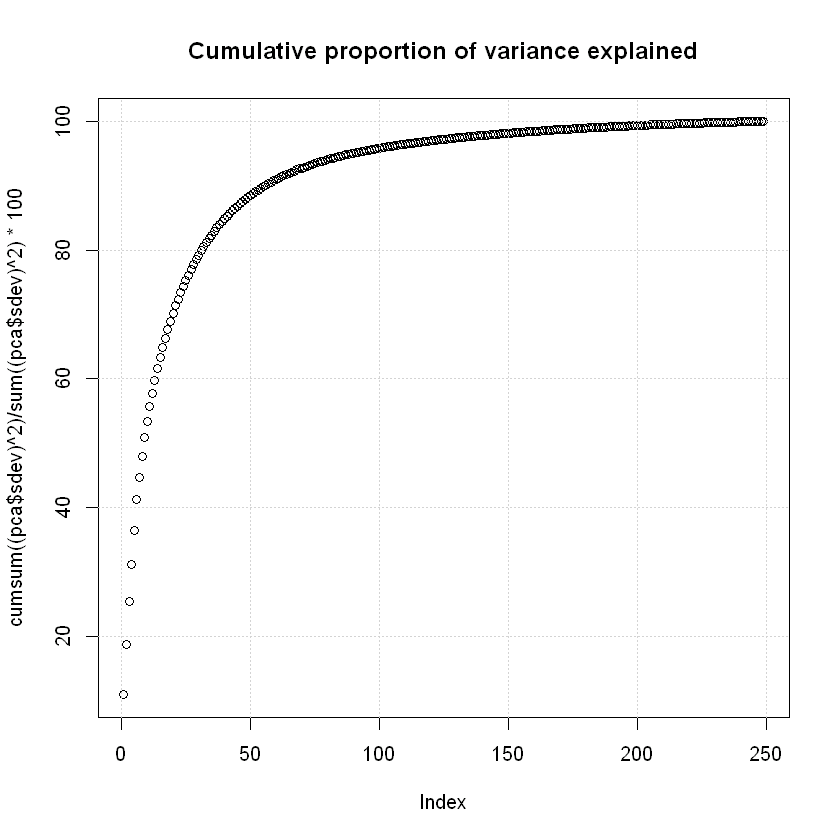

In [33]:
# Se hace la reducción de la dimensionalidad con PCA debido a que siguen siendo bastantes variables
pca = prcomp(trainData_x, center = TRUE, scale. = TRUE)

# Calculo de la proporción acumulativa de la varianza explicada por cada componente principal, 
#multiplica por 100 para expresarlo como porcentaje y determinar número de componentes.
par(mfrow=c(1,1))
plot(cumsum((pca$sdev)^2)/sum((pca$sdev)^2) * 100,main="Cumulative proportion of variance explained")
grid()

In [34]:
#En la grafica se puede observar que con aproximadamente 50 componentes 
#principales se explica aproximadamente el 90% de la varianza. 
#Por lo tanto, se seleccionan 50 componentes principales para la reducción de la dimensionalidad.

n_components = 50
trainData_x_pca = predict(pca, trainData_x)[, 1:n_components] #otra forma de pca_trainData_x = pca$x[,1:n_components, drop = FALSE] 

In [35]:
#Se construye modelo con train 10mil y 10 muestras de test de 5mil
# Se entrena modelo y se hace iteración para cada dígito, de los cuales se almacena la tasa de acierto

n_train = 10000
n_test = 5000
numeros = 0:9
n_iteraciones = 10

#almacenar resultados
resultados_test = matrix(0, nrow = length(numeros), ncol = n_iteraciones)
resultados_train = matrix(0, nrow = length(numeros), ncol = n_iteraciones)
rownames(resultados_test) = rownames(resultados_train) = numeros

set.seed(1234)
# Separación de datos para crear conjuntos
# indices de train
indices_train = sample(1:dim(trainData_x_pca)[1], n_train)
# indices de test 
indices_test.t = setdiff(1:dim(trainData_x_pca)[1], indices_train)
# dividir los indices de test en 10 conjuntos
indices_test = split(sample(indices_test.t), rep(1:10, length.out = length(indices_test.t)))

#datos de train - x
train.x = trainData_x_pca[indices_train,]


for (iter in 1:10){
  #datos de test - x
  test.x = trainData_x_pca[indices_test[[iter]],]
  
  for (idx in 1:length(numeros)) {
    num = numeros[idx]
    y = y_train
    y[which(y_train != num)] = 0 ; y[which(y_train == num)] = 1
    #conjunto de train y test - y
    train.y = y[indices_train]
    test.y = y[indices_test[[iter]]]
    # Construimos dataframe train y test
    df.train = data.frame(y = train.y, x = train.x)
    df.test = data.frame(y = test.y, x = test.x)
    # Entrenamos el modelo
    model = glm(df.train$y ~ ., data = df.train, family = binomial(link = "logit"))
    out = model$fitted.values
    outbin = as.double(out > 0.5)
    accuracy.train = 100*sum(diag(table(df.train$y, outbin))) / length(outbin)
    # Tasa de acierto con el dataset de Test
    out1 = predict(object=model, newdata = df.test)
    outbin1 = as.double(out1 > 0.5)
    accuracy.test = 100*sum(diag(table(df.test$y, outbin1))) / length(outbin1)
    
    resultados_test[idx, iter] = accuracy.test
    resultados_train[idx, iter] = accuracy.train
  }
}

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [36]:
# medias y desviaciones
medias_test = rowMeans(resultados_test)
medias_train = rowMeans(resultados_train)
desviaciones_test = apply(resultados_test, 1, sd)

#dataframe con resultados finales
resultados_finales = data.frame(
  digito = numeros,
  accuracy_media_test = medias_test,
  desviacion_test = desviaciones_test,
  accuracy_media_train = medias_train
)
# Ordenado por accuracy media de test descendente
resultados_finales = resultados_finales[order(resultados_finales$accuracy_media_test, decreasing = TRUE),]
resultados_finales

,digito,accuracy_media_test,desviacion_test,accuracy_media_train
,<int>,<dbl>,<dbl>,<dbl>
1,1,98.826,0.1758914,98.96
0,0,98.652,0.1096256,99.00
6,6,98.236,0.2631096,98.31
7,7,98.048,0.1987069,98.17
4,4,97.454,0.2127179,97.92
2,2,96.864,0.3294170,96.98
3,3,96.824,0.2403331,97.29
9,9,95.432,0.2231492,96.26
8,8,95.250,0.3592894,95.58


En la tabla se puede observar que el modelo entrenado y probado con los diferentes grupos de test, arroja valores de accuracy medio que son cercanos (train y test), lo cual es un buen indicador frente a la predicción del modelo. Ahora bien, la tabla se encuentra organizada de mayor a menor con respecto al accuracy medio de test, que sería la tasa de aciertos del modelo para cada digito. En este ordenamiento se observan que los números 1, 0 y 6 se predicen mejor que otros números como 5, 8, 9, etc. Sin embargo, es importante considerar un intervalo de confianza basado en la dispersión de los datos, la cual podemos comparar de una manera visual en el boxplot. 

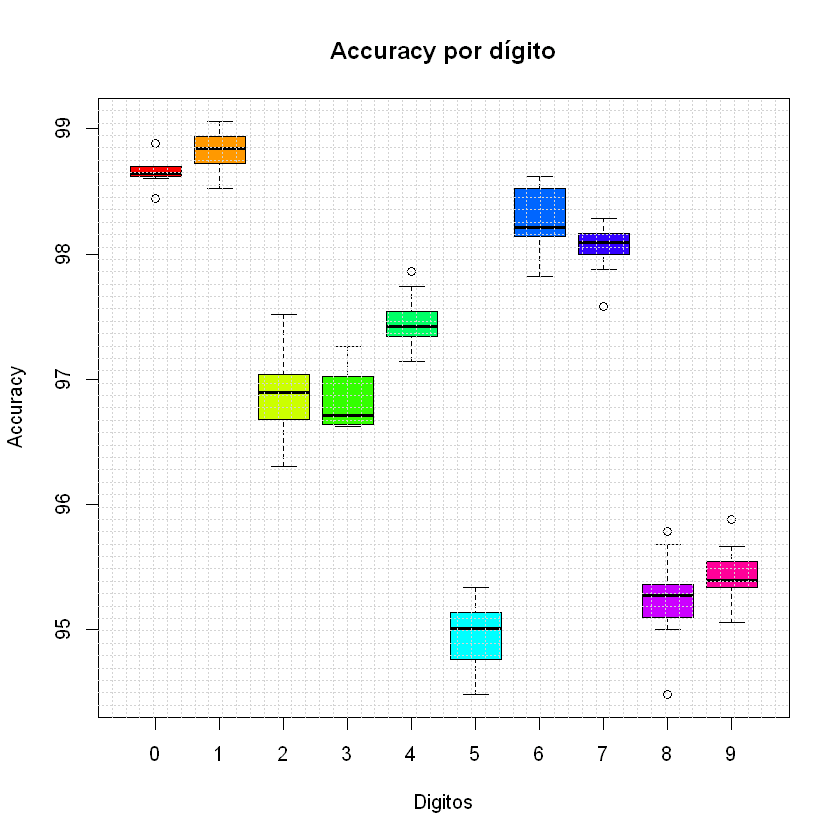

In [37]:
#boxplot
resultados_test_t = t(resultados_test)
boxplot(resultados_test_t, col = rainbow(10), xlab = "Digitos", ylab = "Accuracy", main = "Accuracy por dígito")
#cuadricula pequeñas detras
grid(nx = 50, ny = 50)


En la gráfica se observa un boxplot por cada categoría (número), en la cual se representa la variabilidad de los datos (porcentaje de aciertos) a través de las pestañas de cada caja. Con esto se puede interpretar que algunos números tienen una ligera imprecisión, donde el modelo no es consistente en determinar que número es, debido a la dispersión que afecta la confianza en las medias de ciertos dígitos. Es el caso de 2 y 5, seguidos de 6, 8 y 9. Sin embargo, se observa que algunos números presentan predicciones más consistentes, como el 0, 1 y 7. 

Es importante observar que los modelos 8 y 9 tienen accuracy bajos, valores atípicos y desviación alta, lo cual los hace modelos no tan precisos. Esto podría deberse a la similitud que manejan estos dos números, lo cual podría ser un error a la hora de clasificar. 

Ahora bien, se podría ajustar el ranking considerando una medida de dispersión de los datos de media de accuracy para identificar si para algunos modelos hay algún tipo de solapamiento o igualdad en las tasas de acierto, para así poder identificar si hay modelos que mejoran o empeoran al considerar la desviación como medida de dispersión. 

In [38]:
#Medida de dispersión de la tasa de acierto
resultados_finales$intervalo.sup = resultados_finales$accuracy_media_test + resultados_finales$desviacion_test
resultados_finales$intervalo.inf = resultados_finales$accuracy_media_test - resultados_finales$desviacion_test


In [40]:
#datos de test
resultados_finales[-4]

,digito,accuracy_media_test,desviacion_test,intervalo.sup,intervalo.inf
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,98.826,0.1758914,99.00189,98.65011
0,0,98.652,0.1096256,98.76163,98.54237
6,6,98.236,0.2631096,98.49911,97.97289
7,7,98.048,0.1987069,98.24671,97.84929
4,4,97.454,0.2127179,97.66672,97.24128
2,2,96.864,0.3294170,97.19342,96.53458
3,3,96.824,0.2403331,97.06433,96.58367
9,9,95.432,0.2231492,95.65515,95.20885
8,8,95.250,0.3592894,95.60929,94.89071


En la nueva tabla se observa dos nuevas columnas que indican el intervalo superior de la desviación de los datos y una para el intervalo inferior. Si se comparan los intervalos se observa que algunos modelos tienen un pequeño solapamiento, indicando que dado a la desviación alta de los datos de la tasa de acierto puede haber cierta similitud en los resultados de estas tasas en algunos modelos. Es el caso de (0 - 1), (6 - 7), (3 - 2), y (8 - 9). Esto quiere decir, que este par de números tienen unos accuracy cercano y teniendo en cuenta la desviación podría haber cierta similitud en sus tasas de acierto, por lo cual no es preciso decir cúal es mejor. En términos generales, el ranking dado por el accuracy es bueno para considerar que modelo es mejor que otro, teniendo en cuenta que se puede presentar cierta variación en el ordenamiento de los pares de números indicados.

Es importante decir que, bajo esta métrica de accuracy medio, todos los modelos muestran un buen desempeño relativo. Sin embargo, sería recomendable analizar otras métricas complementarias, como la precisión, el recall o el F1-score, especialmente en casos donde la clasificación de ciertos dígitos puede ser más compleja debido a la similitud visual o la dispersión en los datos. Esto permitiría tener una visión más robusta del rendimiento general de los modelos.